In [12]:
#Single cable driven motion sim

In [28]:
pip install pyelastica

Note: you may need to restart the kernel to use updated packages.


In [132]:
import numpy as np
from elastica import (
    BaseSystemCollection,
    Constraints,
    Forcing,
    PositionVerlet,
    integrate,
    NoForces,
)
from elastica.rod.cosserat_rod import CosseratRod
from elastica.boundary_conditions import OneEndFixedBC
import matplotlib.pyplot as plt

In [133]:
class TendonDrivenSimulator(BaseSystemCollection, Constraints, Forcing):
    pass

In [134]:
sim = TendonDrivenSimulator()

In [135]:
#parameters
n_elem = 50
start = np.zeros((3,))
direction = np.array([0.0, 0.0, 1.0])
normal = np.array([0.0, 1.0, 0.0])
length = 0.4
radius = 0.005
density = 7800
E = 207e9
nu = 0.3

In [136]:
#create rod
rod = CosseratRod.straight_rod(
    n_elements=n_elem,
    start=start,
    direction=direction,
    normal=normal,
    base_length=length,
    base_radius=radius,
    density=density,
    youngs_modulus=E,
    nu=nu,
)

In [137]:
sim.append(rod)

In [138]:
#BC
sim.constrain(rod).using(
    OneEndFixedBC,
    constrained_position_idx=(0,),
    constrained_director_idx=(0,),
)

In [139]:
sim.finalize()
timestepper = PositionVerlet()
final_time = 50.0
dt = 1e-4
total_steps = int(final_time / dt)

integrate(timestepper, sim, final_time, total_steps)

100%|██████████| 500000/500000 [00:49<00:00, 10079.99it/s]

Final time of simulation is :  50.00000000109806


50.00000000109806

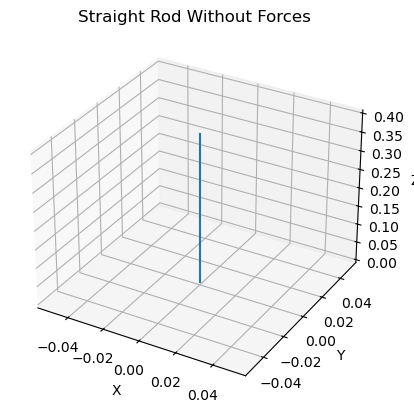

In [140]:
x, y, z = rod.position_collection
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z)
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Straight Rod Without Forces")
plt.show()
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.plot(x, y, z, label="Deformed rod", color='blue')
#ax.set_xlabel("X (m)")
#ax.set_ylabel("Y (m)")
#ax.set_zlabel("Z (m)")
#ax.set_title("Rod With Constant Lateral Force")
#ax.set_box_aspect([1, 1, 1])
#plt.legend()
#plt.tight_layout()
#plt.show()